In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

from collections import Counter

data = pd.read_csv("spotify-2023.csv")

def myfilter(x):
    x = str(x).replace("Tyler, The Creator","Tyler - The Creator")
    return x.split(',')
artists = data['artist(s)_name'].apply(myfilter)
#artists = artists[artists.apply(lambda x : len(x) == 1)]
fart = set()
for i in artists:
    for j in i:
        if j.strip() != '':
            fart.add(j.strip())
print(len(fart))
fart

697


{'(G)I-DLE',
 '070 Shake',
 '21 Savage',
 '24kgoldn',
 '2Pac',
 '347aidan',
 '4*TOWN (From Disney and Pixar���s Turning Red)',
 '50 Cent',
 'A Boogie Wit da Hoodie',
 'A$AP Rocky',
 'ACRAZE',
 'AP Dhillon',
 'ARIZONATEARS',
 "AX'EL",
 'Abhijay Sharma',
 'Abhir Hathi',
 'Adassa',
 'Adele',
 'Aerosmith',
 'AgroPlay',
 'Agust D',
 'Aitana',
 'Aitch',
 'Ak4:20',
 'Alec Benjamin',
 'Alejo',
 'Alesso',
 'Ali Sethi',
 'Alicia Keys',
 'Altamash Faridi',
 'Alvaro Diaz',
 'Amaarae',
 'Amanda Reifer',
 'Amitabh Bhattacharya',
 'Amitabha Bhattacharya',
 'Ana Castela',
 'Anderson .Paak',
 'Andy Williams',
 'Angela Aguilar',
 'Anggi Marito',
 'Anitta',
 'Anne-Marie',
 'AnnenMayKantereit',
 'Anuel Aa',
 'Aqua',
 'Arcane',
 'Arcangel',
 'Arctic Monkeys',
 'Ariana Grande',
 'Arijit Singh',
 'Armani White',
 'Ava',
 'Aventura',
 'Avicii',
 'Ayparia',
 'B. Swanson Quartet',
 'BIGBANG',
 'BL',
 'BLACKPINK',
 'BLESSD',
 'BTS',
 'BYOR',
 'Baby Keem',
 'Baby Rasta',
 'Baby Tate',
 'Bad B',
 'Bad Bunny',
 'Ba

In [13]:
#artists = data['artist(s)_name'].transform(lambda x : x.split(','))
artists = data['artist(s)_name'].apply(lambda x: x.split(','))
artists = artists[artists.apply(lambda x : len(x) > 1)]

te = TransactionEncoder()
te_data = te.fit(artists).transform(artists)

encoded_data = pd.DataFrame(te_data, columns=te.columns_)
frequent_itemsets = apriori(encoded_data, min_support=0.005, use_colnames=True)

print(frequent_itemsets.head(100))

     support                 itemsets
0   0.005464             ( 070 Shake)
1   0.035519             ( 21 Savage)
2   0.005464  ( Amitabh Bhattacharya)
3   0.005464           ( Ana Castela)
4   0.005464        ( Anderson .Paak)
..       ...                      ...
95  0.005464           (Daddy Yankee)
96  0.008197           (David Guetta)
97  0.005464           (De La Ghetto)
98  0.008197                (Dr. Dre)
99  0.040984                  (Drake)

[100 rows x 2 columns]


In [23]:
rules = association_rules(df=frequent_itemsets, metric="confidence", min_threshold=0.1, num_itemsets=1)

filtered_rules = rules[(rules['antecedents'].map(len) > 1) & 
                       (rules['consequents'].map(len) == 1)]

filtered_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
92,"( Anderson .Paak, Bruno Mars)",( Silk Sonic),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
93,"( Anderson .Paak, Silk Sonic)",(Bruno Mars),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
94,"( Silk Sonic, Bruno Mars)",( Anderson .Paak),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
98,"( DJ Luian, Anuel Aa)",(Mambo Kingz),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
99,"( DJ Luian, Mambo Kingz)",( Anuel Aa),0.005464,0.008197,0.005464,1.0,122.0,1.0,0.005420,inf,0.997253,0.666667,1.0,0.833333
100,"( Anuel Aa, Mambo Kingz)",( DJ Luian),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
104,"(Imagine Dragons, Arcane)",( League of Legends),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
105,"(Imagine Dragons, League of Legends)",( Arcane),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
106,"( League of Legends, Arcane)",(Imagine Dragons),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
110,"( Kumaar, Vishal Dadlani)",( Shekhar Ravjiani),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000


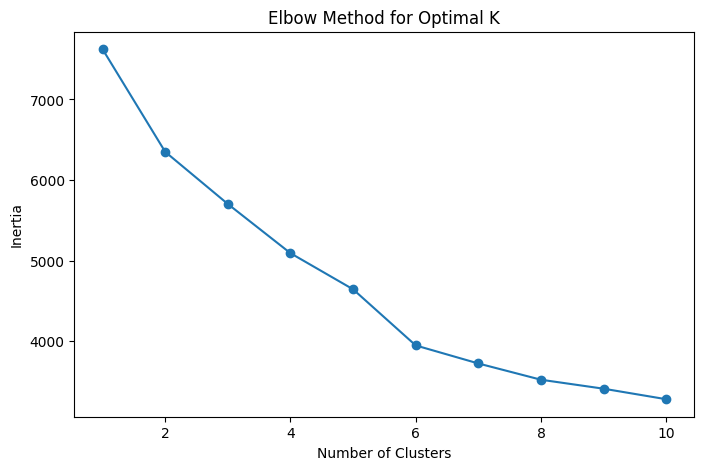

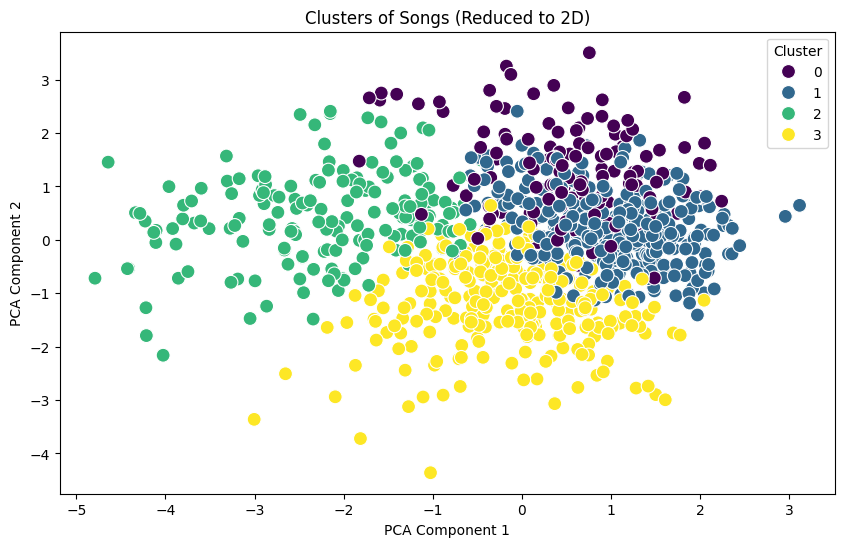

                bpm  danceability_%   energy_%  valence_%  acousticness_%  \
Cluster                                                                     
0        124.992424       73.803030  63.181818  52.568182       26.689394   
1        115.187845       76.591160  71.491713  68.991713       19.513812   
2        117.642045       54.909091  42.380682  36.176136       65.755682   
3        133.848057       58.975265  69.183746  37.925795       12.812721   

         instrumentalness_%  liveness_%  speechiness_%  
Cluster                                                 
0                  0.083333   16.015152      31.196970  
1                  0.419890   15.911602       6.991713  
2                  2.596591   15.528409       6.278409  
3                  3.134276   23.851590       6.717314  


In [42]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('spotify-2023.csv')

# Select features for clustering
features = ['bpm', 'danceability_%', 'energy_%', 'valence_%', 
            'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
features = ['']

# Drop missing values for the selected features
data = data.dropna(subset=features)

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data[features])

# Determine optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means with the optimal number of clusters
optimal_k = 4  # Adjust based on the Elbow Curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)
data['PCA1'] = reduced_features[:, 0]
data['PCA2'] = reduced_features[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters of Songs (Reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Display cluster feature summary
cluster_summary = data.groupby('Cluster')[features].mean()
print(cluster_summary)


In [40]:
# Step 1: Split artist names into individual entries
data['artist_list'] = data['artist(s)_name'].apply(lambda x: x.split(','))

# Step 2: Flatten the list of artists and count occurrences
all_artists = [artist.strip() for artists in data['artist_list'] for artist in artists]
artist_counts = Counter(all_artists)

# Step 3: Find the top 10 artists with the most songs
top_10_artists = artist_counts.most_common(59)

# Step 4: Convert to a DataFrame for display
top_10_df = pd.DataFrame(top_10_artists, columns=['Artist', 'Song_Count'])

print(top_10_df)

             Artist  Song_Count
0         Bad Bunny          40
1      Taylor Swift          38
2        The Weeknd          37
3               SZA          23
4    Kendrick Lamar          23
5              Feid          21
6             Drake          19
7      Harry Styles          17
8        Peso Pluma          16
9         21 Savage          14
10     Metro Boomin          14
11       Ed Sheeran          14
12    Morgan Wallen          13
13              BTS          13
14          Quevedo          12
15   Rauw Alejandro          12
16         Bizarrap          10
17          Karol G          10
18           Future          10
19         Doja Cat          10
20         Dua Lipa           9
21           Eminem           9
22         Labrinth           8
23   Olivia Rodrigo           7
24   Grupo Frontera           7
25         Junior H           7
26      Post Malone           7
27    Justin Bieber           7
28         NewJeans           6
29    Billie Eilish           6
30      

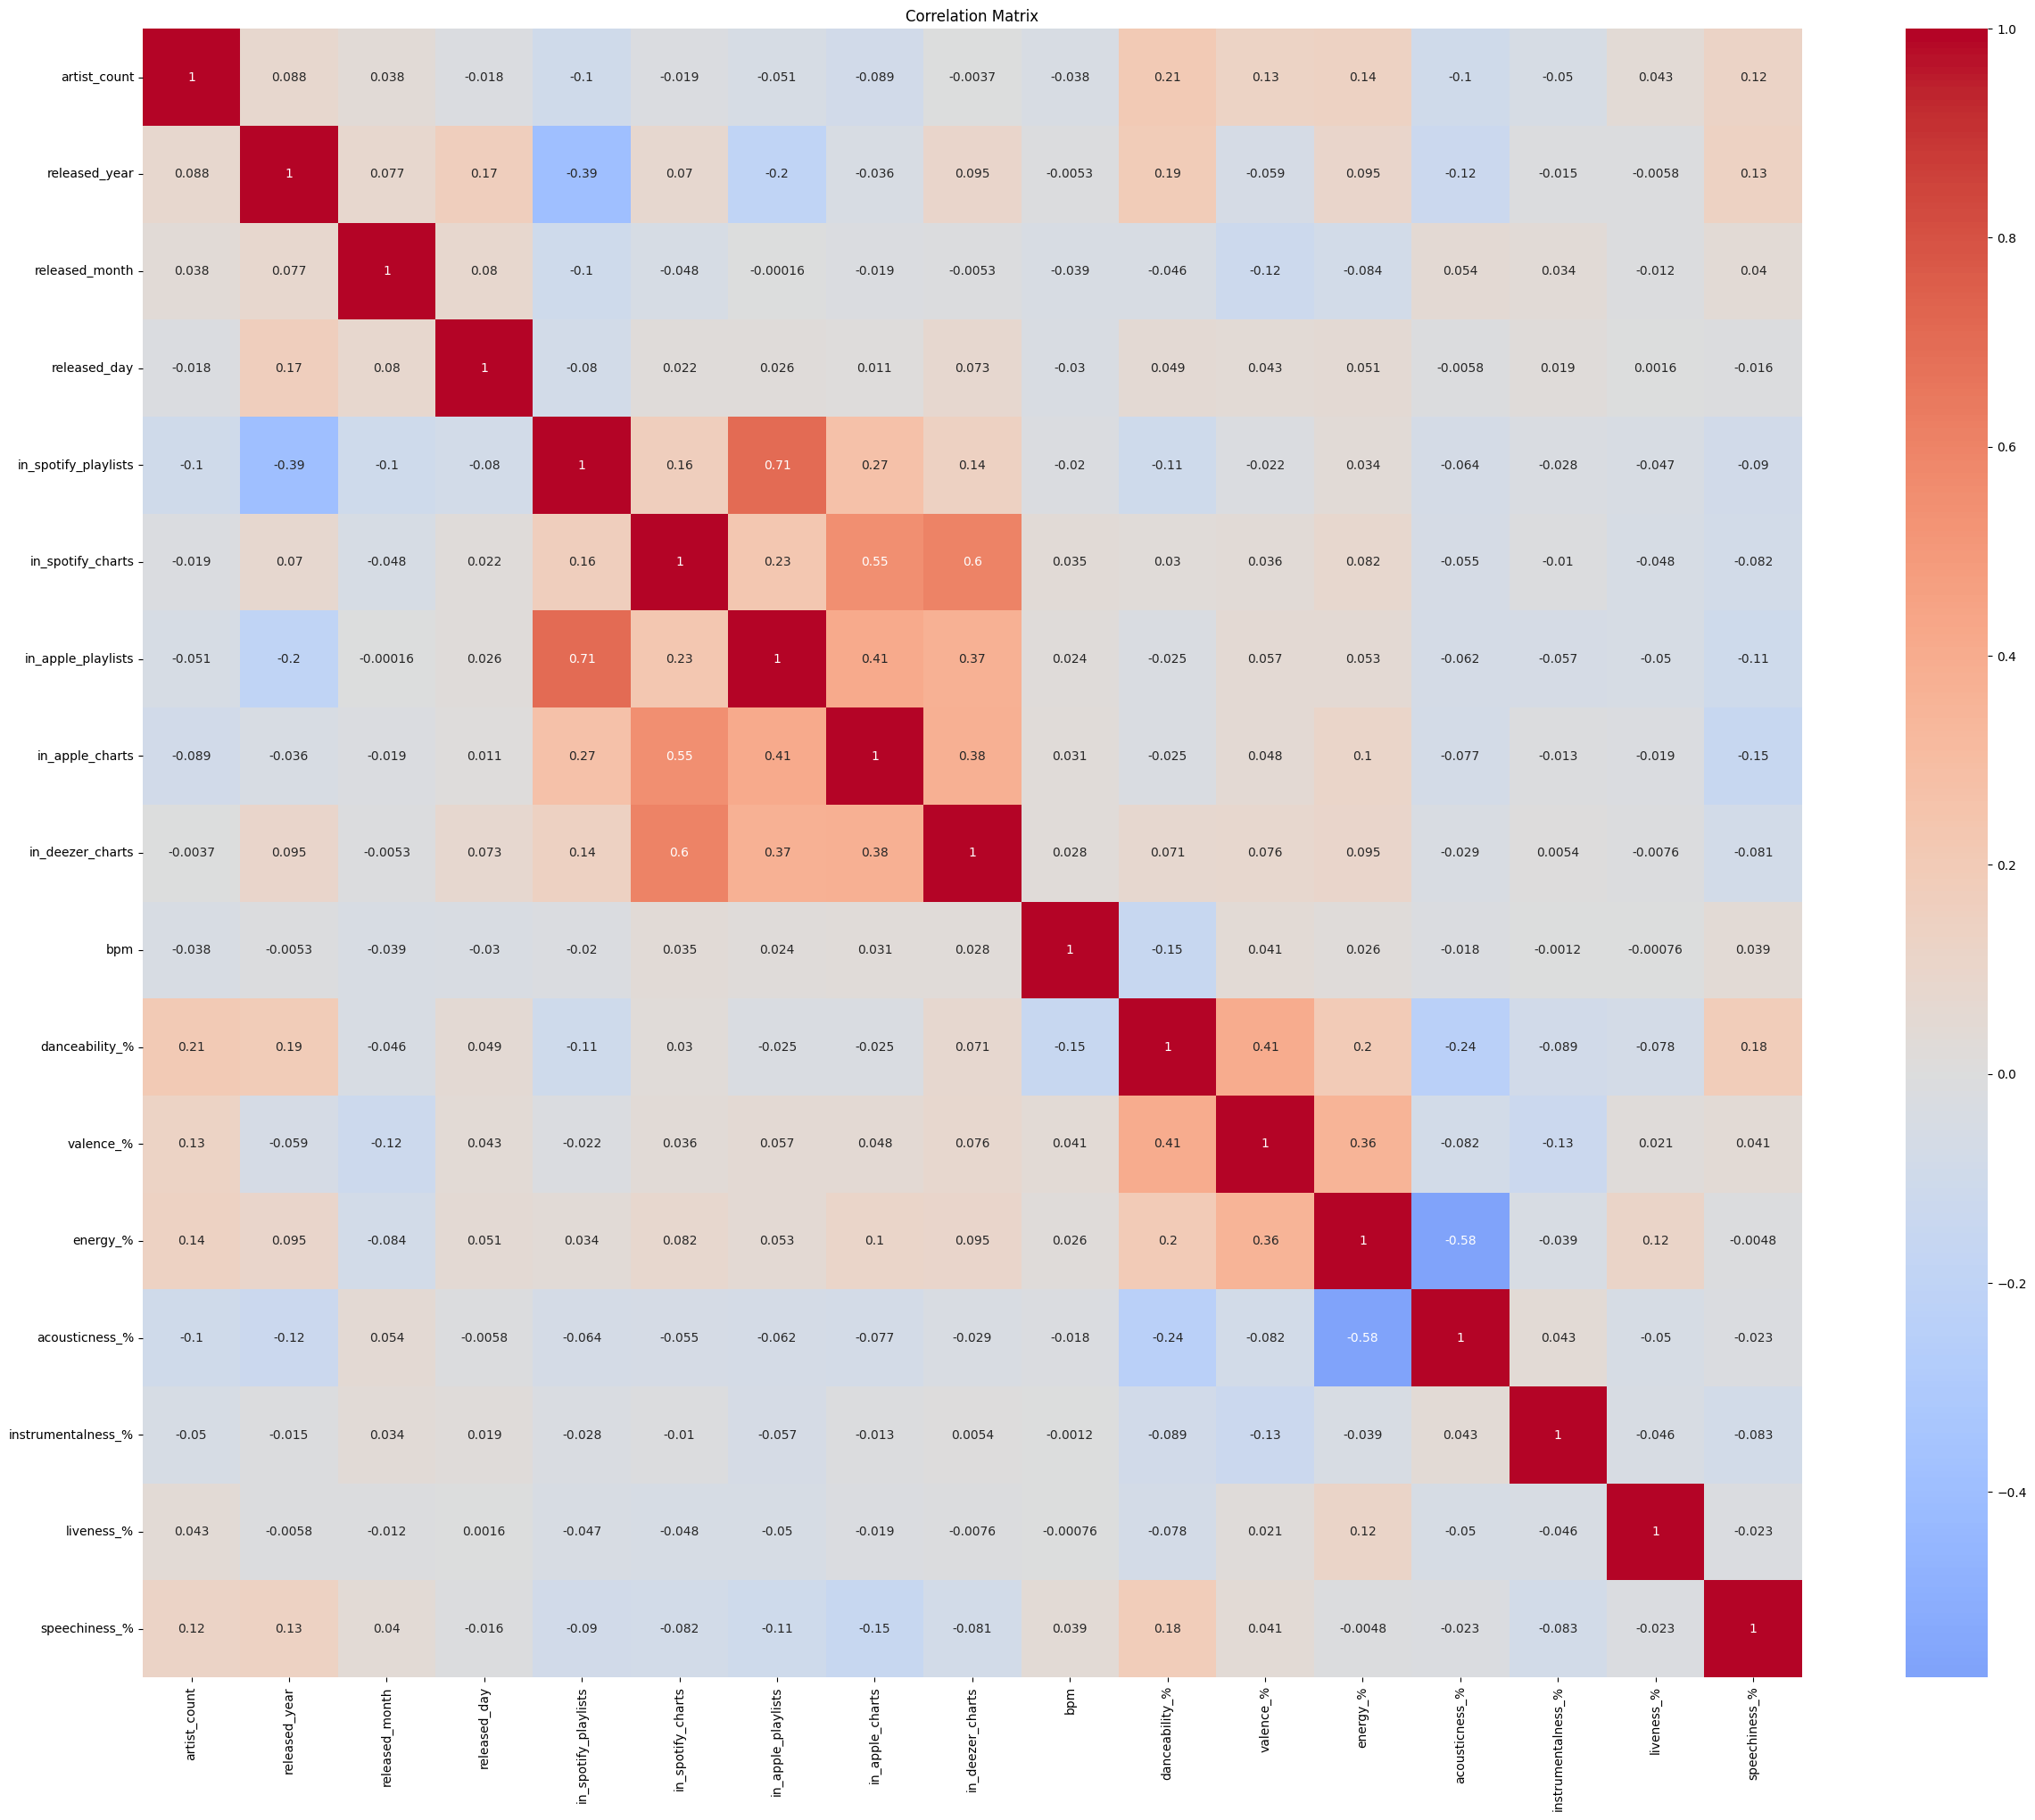

In [7]:
# Correlation Matrix ( Numeric Only )
corr_matrix = data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=np.array((10, 8)) * 3)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [26]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).head(20))

in_spotify_playlists  in_apple_playlists    0.708277
in_spotify_charts     in_deezer_charts      0.600205
                      in_apple_charts       0.552232
in_apple_playlists    in_apple_charts       0.414523
danceability_%        valence_%             0.408451
in_apple_charts       in_deezer_charts      0.383668
in_apple_playlists    in_deezer_charts      0.369032
valence_%             energy_%              0.357612
in_spotify_playlists  in_apple_charts       0.271317
in_spotify_charts     in_apple_playlists    0.233354
artist_count          danceability_%        0.207027
danceability_%        energy_%              0.198095
released_year         danceability_%        0.187333
danceability_%        speechiness_%         0.184977
released_year         released_day          0.174282
in_spotify_playlists  in_spotify_charts     0.164331
                      in_deezer_charts      0.144342
artist_count          energy_%              0.137096
released_year         speechiness_%         0.

In [5]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).tail(10))

in_apple_playlists  speechiness_%          -0.108011
released_month      valence_%              -0.118571
released_year       acousticness_%         -0.124156
valence_%           instrumentalness_%     -0.132890
bpm                 danceability_%         -0.147095
in_apple_charts     speechiness_%          -0.151539
released_year       in_apple_playlists     -0.198998
danceability_%      acousticness_%         -0.236165
released_year       in_spotify_playlists   -0.392204
energy_%            acousticness_%         -0.577344
dtype: float64

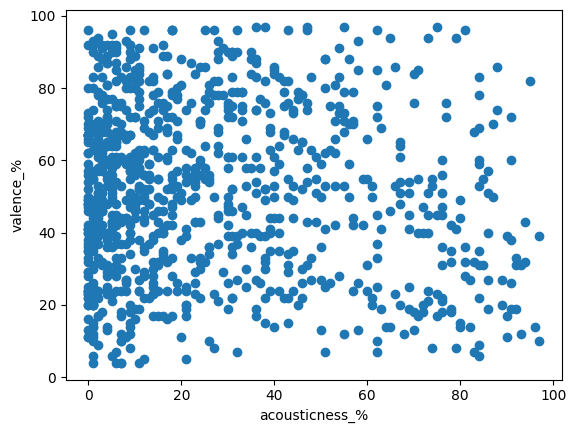

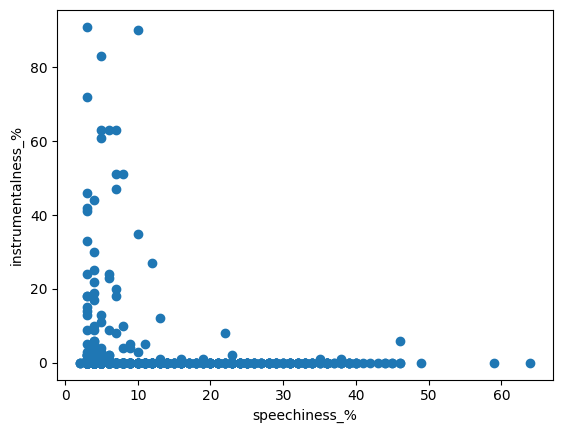

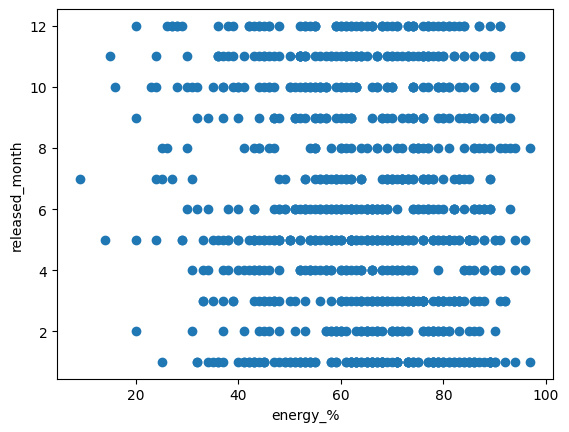

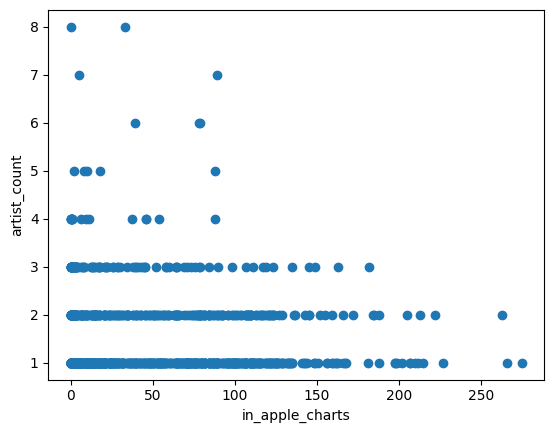

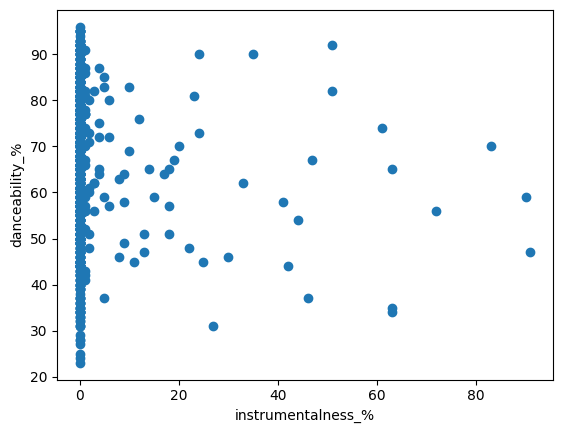

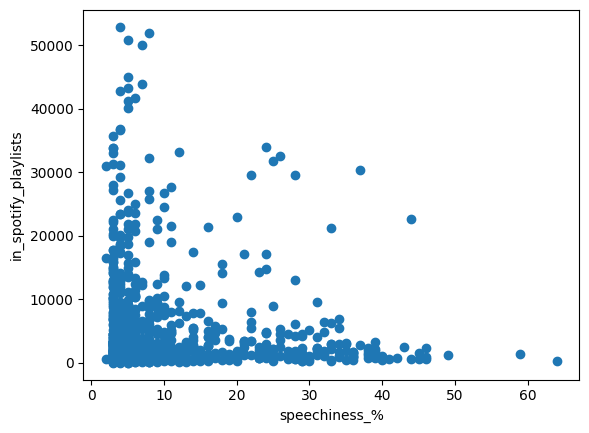

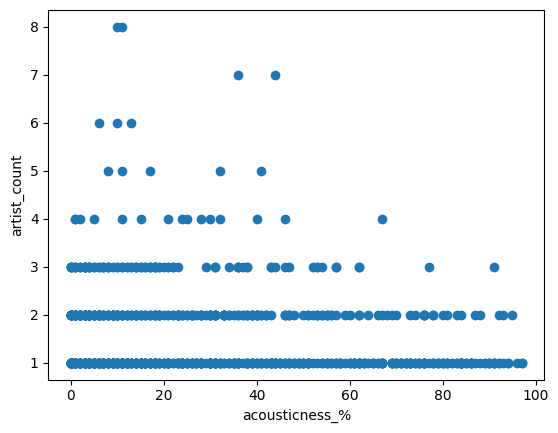

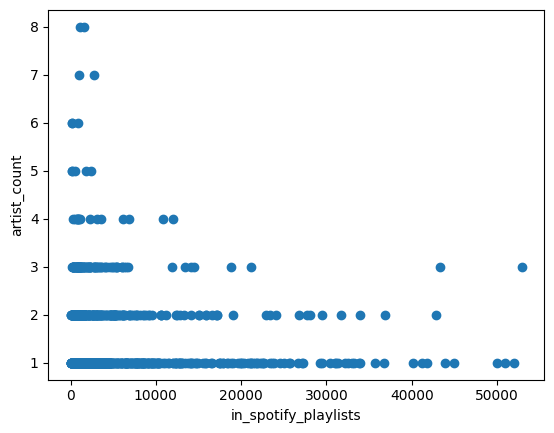

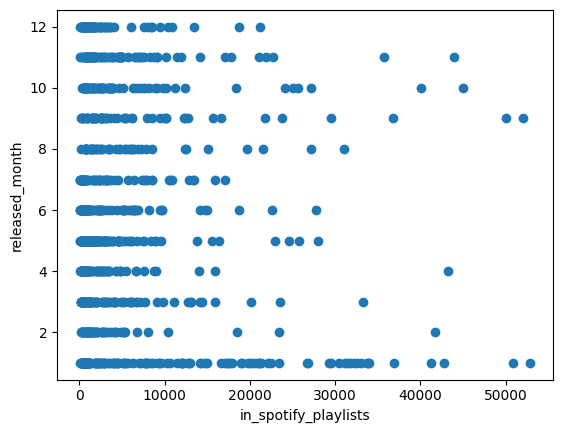

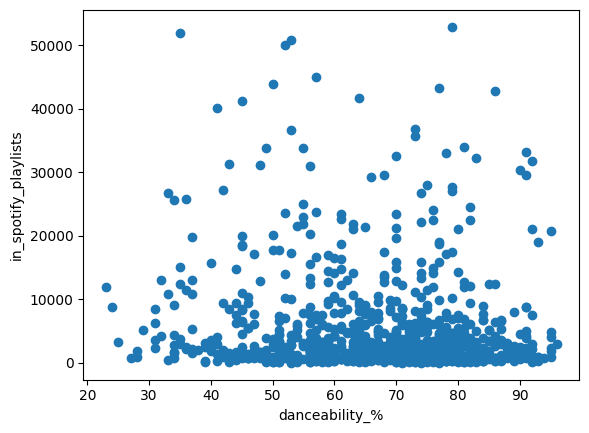

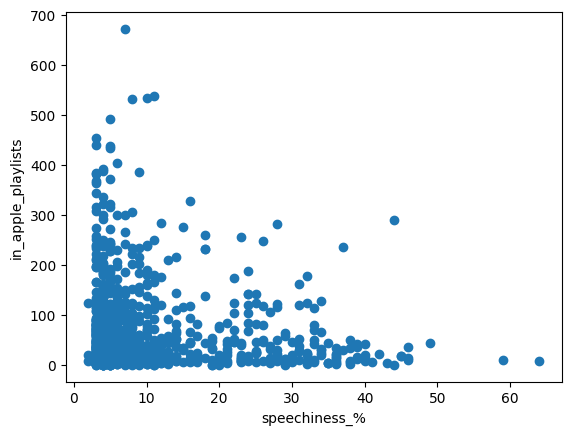

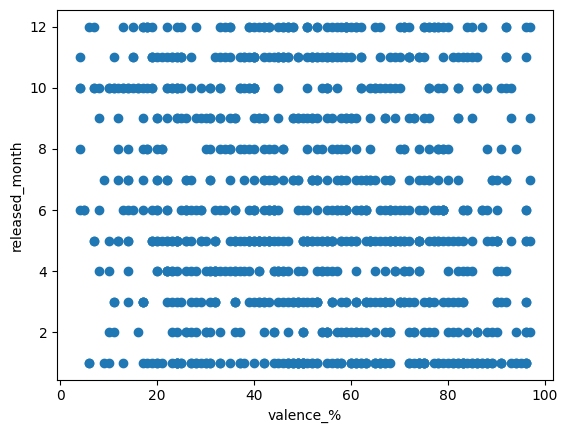

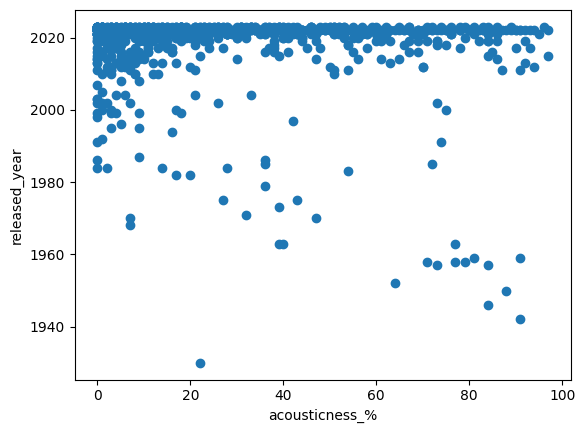

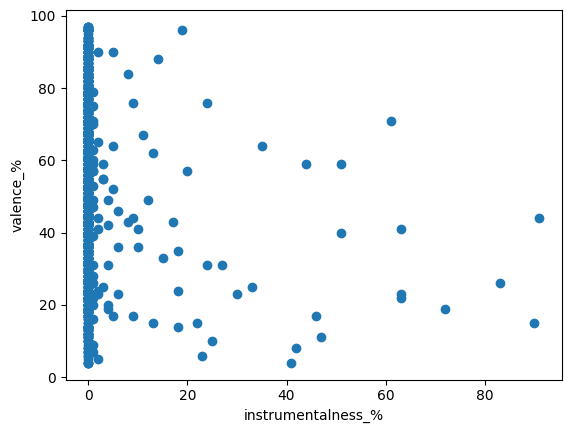

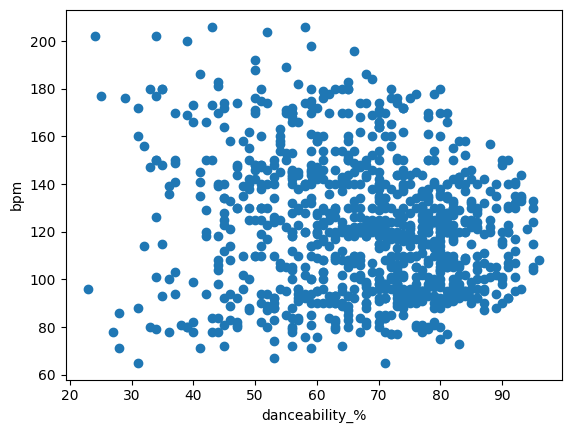

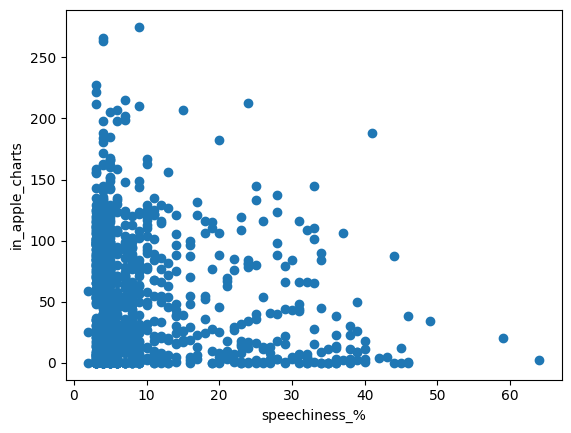

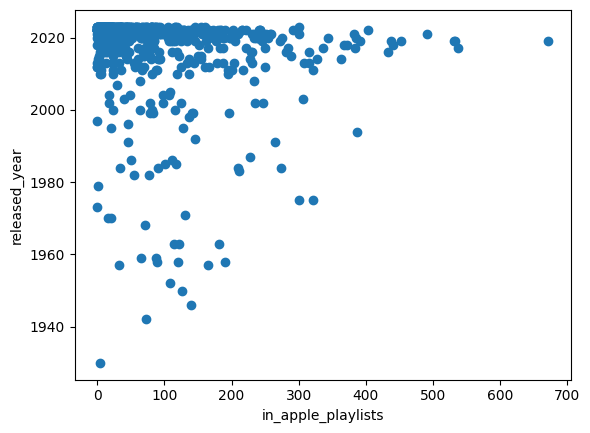

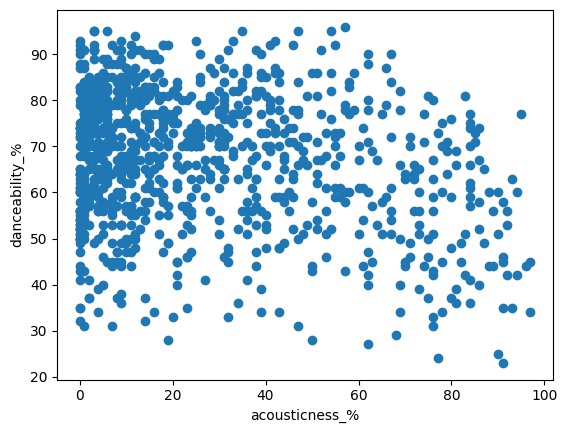

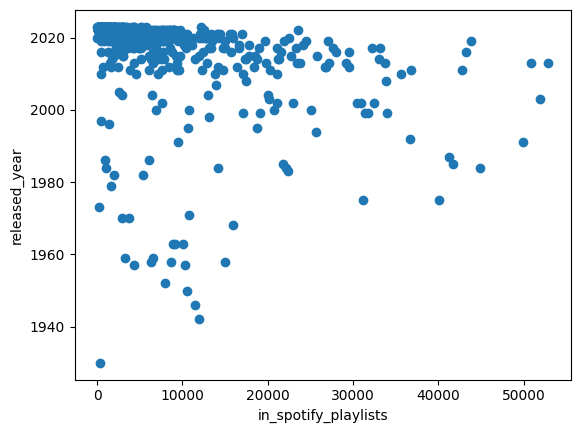

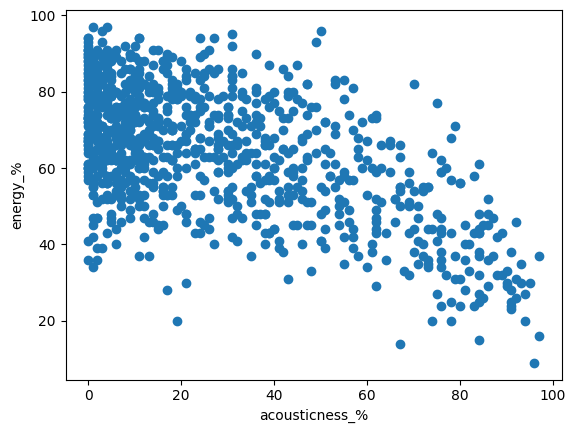

In [37]:
# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Extract the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the matrix to convert it into a series and drop NaN values
sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).head(30)
inv_sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).tail(20)

top_pairs = [pair for pair in sorted_pairs.index]
inv_top_pairs = [pair for pair in inv_sorted_pairs.index]

for (var2, var1) in inv_top_pairs:
    plt.scatter(data[var2], data[var1])
    plt.xlabel(var2)
    plt.ylabel(var1)
    # plt.title('Simple Scatterplot')
    plt.show()
    continue

    plt.figure(figsize=(8, 6))
    sns.lmplot(data=data, x=var1, y=var2, height=6, aspect=1.2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()